In [161]:
#IMPORT DATA
import os
import numpy as np
import pandas as pd
import xarray as xr
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import warnings

warnings.filterwarnings('ignore')
# import ray
import matplotlib as mpl

from tqdm import tqdm
np.set_printoptions(suppress=True) #remove exponents 




In [162]:

#read in h5 file 
df = pd.read_hdf(r"T:\\freely_moving_ephys\ephys_recordings\051123\J647RT\hf1_wn\051123_J647RT_control_Rig2_hf1_wn_ephys_props.h5")

In [163]:
df

,Wn_Amplitude,Wn_ContamPct,Wn_KSLabel,Wn_amp,Wn_ch,Wn_depth,Wn_fr,Wn_group,Wn_n_spikes,Wn_sh,...,Wn_theta,Wn_phi,Wn_ballspeed,Wn_ballspeed_tuning_bins,Wn_ballspeed_tuning,Wn_ballspeed_tuning_err,Wn_lfp_power,Wn_layer5cent_from_lfp,Wn_worldT,session
9,951.1,0.0,mua,79.604454,9,550,0.349691,good,1826,0,...,"[4.769995172504416, 4.669293036247968, 5.13730...","[0.6194623316324517, 0.6134662990475075, 0.697...","[4.998509491806925, 5.139423317425948, 5.45460...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[0.7492526656963244, 0.7174388450939295, 0.903...","[0.024241989488281712, 0.035374169806959364, 0...","[[0.7756778268051239, 0.8168059427319342, 0.77...","[9, 6, 3, 6]","[-0.8208645000013348, -0.8173959999985527, -0....",051123_J647RT_control_Rig2
10,1808.4,0.0,good,136.140686,10,525,0.993726,good,5189,0,...,"[4.769995172504416, 4.669293036247968, 5.13730...","[0.6194623316324517, 0.6134662990475075, 0.697...","[4.998509491806925, 5.139423317425948, 5.45460...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[1.1438408192062843, 0.9727639851907118, 0.922...","[0.02968420143776962, 0.03913528835740804, 0.0...","[[0.7756778268051239, 0.8168059427319342, 0.77...","[9, 6, 3, 6]","[-0.8208645000013348, -0.8173959999985527, -0....",051123_J647RT_control_Rig2
15,929.4,11.5,mua,73.797424,13,450,6.449358,good,33677,0,...,"[4.769995172504416, 4.669293036247968, 5.13730...","[0.6194623316324517, 0.6134662990475075, 0.697...","[4.998509491806925, 5.139423317425948, 5.45460...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[10.022950368721451, 10.420038066273408, 10.17...","[0.08837388735827172, 0.13283752745552183, 0.2...","[[0.7756778268051239, 0.8168059427319342, 0.77...","[9, 6, 3, 6]","[-0.8208645000013348, -0.8173959999985527, -0....",051123_J647RT_control_Rig2
17,927.3,10.6,mua,74.134933,13,450,5.882882,good,30719,0,...,"[4.769995172504416, 4.669293036247968, 5.13730...","[0.6194623316324517, 0.6134662990475075, 0.697...","[4.998509491806925, 5.139423317425948, 5.45460...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[9.401891681139833, 10.185319783437047, 9.6138...","[0.08517027247571923, 0.13170377125439936, 0.2...","[[0.7756778268051239, 0.8168059427319342, 0.77...","[9, 6, 3, 6]","[-0.8208645000013348, -0.8173959999985527, -0....",051123_J647RT_control_Rig2
19,1089.8,8.5,good,93.258591,14,425,7.779944,good,40625,0,...,"[4.769995172504416, 4.669293036247968, 5.13730...","[0.6194623316324517, 0.6134662990475075, 0.697...","[4.998509491806925, 5.139423317425948, 5.45460...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[12.852161322752579, 13.261445683343478, 15.25...","[0.09041021872680495, 0.13393390928084112, 0.2...","[[0.7756778268051239, 0.8168059427319342, 0.77...","[9, 6, 3, 6]","[-0.8208645000013348, -0.8173959999985527, -0....",051123_J647RT_control_Rig2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,955.9,9.0,good,81.204643,115,300,4.387027,good,22908,0,...,"[4.769995172504416, 4.669293036247968, 5.13730...","[0.6194623316324517, 0.6134662990475075, 0.697...","[4.998509491806925, 5.139423317425948, 5.45460...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[7.306347127627866, 7.778334732644699, 8.44179...","[0.06894903546179948, 0.10358599290115167, 0.1...","[[0.7756778268051239, 0.8168059427319342, 0.77...","[9, 6, 3, 6]","[-0.8208645000013348, -0.8173959999985527, -0....",051123_J647RT_control_Rig2
166,1562.4,1.7,good,134.775818,117,250,6.020575,good,31438,0,...,"[4.769995172504416, 4.669293036247968, 5.13730...","[0.6194623316324517, 0.6134662990475075, 0.697...","[4.998509491806925, 5.139423317425948, 5.45460...","[0.005, 0.055, 0.15000000000000002, 0.35, 0.75]","[8.3149156841538, 8.484036698630913, 7.5643105...","[0.0804763154845618, 0.12070937452333527, 0.20...","[[0.7756778268051239, 0.8168059427319342, 0.77...","[9, 6, 3, 6]","[-0.8208645000013348, -0.8173959999985527, -0....",051123_J647RT_control_Rig2
182,1779.0,0.0,good,121.239883,125,50,1.

In [164]:
df.columns.to_numpy()

array(['Wn_Amplitude', 'Wn_ContamPct', 'Wn_KSLabel', 'Wn_amp', 'Wn_ch',
       'Wn_depth', 'Wn_fr', 'Wn_group', 'Wn_n_spikes', 'Wn_sh',
       'Wn_waveform', 'Wn_spikeT', 'Wn_t0', 'Wn_spikeTraw', 'Wn_rate',
       'Wn_contrast', 'Wn_contrast_tuning_bins', 'Wn_contrast_tuning',
       'Wn_contrast_tuning_err', 'Wn_spike_triggered_average',
       'Wn_spike_triggered_variance', 'Wn_saccade_rightT',
       'Wn_saccade_leftT', 'Wn_saccade_rightPSTH', 'Wn_saccade_leftPSTH',
       'Wn_pupilradius_tuning_bins', 'Wn_pupilradius_tuning',
       'Wn_pupilradius_tuning_err', 'Wn_theta_tuning_bins',
       'Wn_theta_tuning', 'Wn_theta_tuning_err', 'Wn_phi_tuning_bins',
       'Wn_phi_tuning', 'Wn_phi_tuning_err', 'Wn_eyeT', 'Wn_dEye_dpf',
       'Wn_dEye', 'Wn_theta', 'Wn_phi', 'Wn_ballspeed',
       'Wn_ballspeed_tuning_bins', 'Wn_ballspeed_tuning',
       'Wn_ballspeed_tuning_err', 'Wn_lfp_power',
       'Wn_layer5cent_from_lfp', 'Wn_worldT', 'session'], dtype=object)

In [ ]:
#create new column in data frame and fill with nans 
df['new'] = np.nan 

In [ ]:
#iterate across rows to find modulated contrast response difference and add new column, also add new experiment and data columns 

for ind,row in df.iterrows(): 
    x = ((row['Wn_contrast_tuning'][-1] - row['Wn_contrast_tuning'][0])/(row['Wn_contrast_tuning'][-1] + row['Wn_contrast_tuning'][0]))
    session = row.session
    date = session.split('_',)[0]
    name = session.split('_',)[1]

    df.at[ind,'Wn_diff_mod'] = x.astype(float)
    df.at[ind,'name'] = name
    df.at[ind,'date'] = date

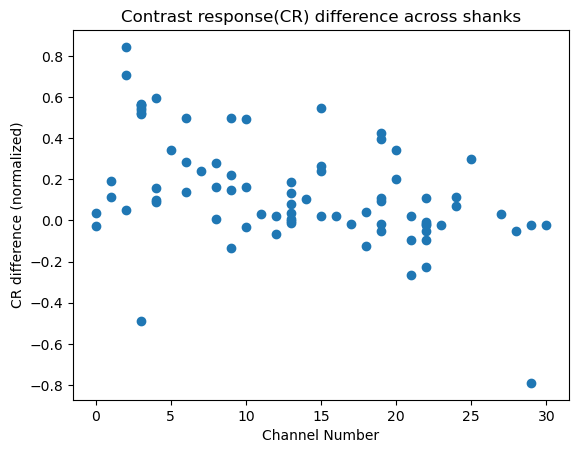

In [ ]:
# plot contrast response difference with modulation index to normalize. 
plt.ylabel('CR difference (normalized)')
plt.xlabel('Channel Number')
plt.title('Contrast response(CR) difference across shanks')
plt.scatter(df.Wn_ch%32, df.Wn_diff_mod)

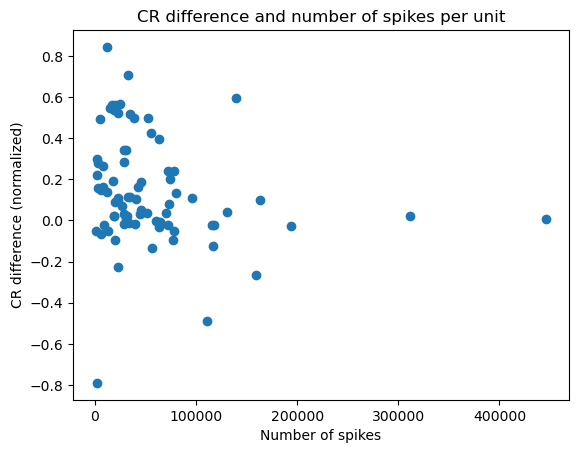

In [ ]:
#plot number of spikes and CR difference(mod) for HF wn
plt.xlabel('Number of spikes')
plt.ylabel('CR difference (normalized)')
plt.title('CR difference and number of spikes per unit')
plt.scatter(df.Wn_n_spikes, df.Wn_diff_mod)

In [ ]:
""" Takes in dataframe and column_name
column_name is a string"""
def make_new_columns(df,column_name):
    df[column_name] = np.nan
    return column_name

FM analysis

In [ ]:
df_fm = pd.read_hdf(r"T:\\freely_moving_ephys\ephys_recordings\051123\J647RT\fm1\051123_J647RT_control_Rig2_fm1_ephys_props.h5")

In [166]:
df_fm.head()

,FmLt_Amplitude,FmLt_ContamPct,FmLt_KSLabel,FmLt_amp,FmLt_ch,FmLt_depth,FmLt_fr,FmLt_group,FmLt_n_spikes,FmLt_sh,...,FmLt_topT,FmLt_top_speed,FmLt_top_forward_run,FmLt_top_fine_motion,FmLt_top_backward_run,FmLt_top_immobility,FmLt_top_head_yaw,FmLt_top_body_yaw,FmLt_top_movement_yaw,session
9,951.1,0.0,mua,79.604454,9,550,0.349691,good,1826,0,...,"[-0.5785340000002179, -0.5617920000004233, -0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",051123_J647RT_control_Rig2
10,1808.4,0.0,good,136.140686,10,525,0.993726,good,5189,0,...,"[-0.5785340000002179, -0.5617920000004233, -0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",051123_J647RT_control_Rig2
15,929.4,11.5,mua,73.797424,13,450,6.449358,good,33677,0,...,"[-0.5785340000002179, -0.5617920000004233, -0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",051123_J647RT_control_Rig2
17,927.3,10.6,mua,74.134933,13,450,5.882882,good,30719,0,...,"[-0.5785340000002179, -0.5617920000004233, -0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",051123_J647RT_control_Rig2
19,1089.8,8.5,good,93.258591,14,425,7.779944,good,40625,0,...,"[-0.5785340000002179, -0.5617920000004233, -0....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",051123_J647RT_control_Rig2


In [168]:
df_fm.columns.to_numpy()

array(['FmLt_Amplitude', 'FmLt_ContamPct', 'FmLt_KSLabel', 'FmLt_amp',
       'FmLt_ch', 'FmLt_depth', 'FmLt_fr', 'FmLt_group', 'FmLt_n_spikes',
       'FmLt_sh', 'FmLt_waveform', 'FmLt_spikeT', 'FmLt_t0',
       'FmLt_spikeTraw', 'FmLt_rate', 'FmLt_contrast_tuning_bins',
       'FmLt_contrast_tuning', 'FmLt_contrast_tuning_err',
       'FmLt_spike_triggered_average', 'FmLt_spike_triggered_variance',
       'FmLt_saccade_rightT', 'FmLt_saccade_leftT',
       'FmLt_compensatory_rightT', 'FmLt_compensatory_leftT',
       'FmLt_gazeshift_leftT', 'FmLt_gazeshift_rightT',
       'FmLt_saccade_rightPSTH', 'FmLt_saccade_leftPSTH',
       'FmLt_compensatory_rightPSTH', 'FmLt_compensatory_leftPSTH',
       'FmLt_gazeshift_leftPSTH', 'FmLt_gazeshift_rightPSTH',
       'FmLt_pupilradius_tuning_bins', 'FmLt_pupilradius_tuning',
       'FmLt_pupilradius_tuning_err', 'FmLt_theta_tuning_bins',
       'FmLt_theta_tuning', 'FmLt_theta_tuning_err',
       'FmLt_phi_tuning_bins', 'FmLt_phi_tuning', 'FmLt

In [171]:
df_fm.FmLt_gazeshift_rightPSTH

9      [2.4265167470467165e-39, 9.238349345485166e-39...
10     [3.542444916422941, 3.8831456594274694, 4.2176...
15     [0.36437250133767873, 0.44710274271379047, 0.5...
17     [2.0570190979986824, 2.363047394556133, 2.6886...
19     [1.638558551402221e-17, 3.977624415211527e-17,...
                             ...                        
157    [12.605075997369537, 13.181119115426178, 13.68...
166    [9.14701738402657, 9.547321819190033, 9.924568...
182    [6.497872186805893, 6.645958517801813, 6.75143...
183    [2.129322675607854e-26, 6.349468841849323e-26,...
185    [17.050844207198555, 18.017102977013504, 18.97...
Name: FmLt_gazeshift_rightPSTH, Length: 80, dtype: object

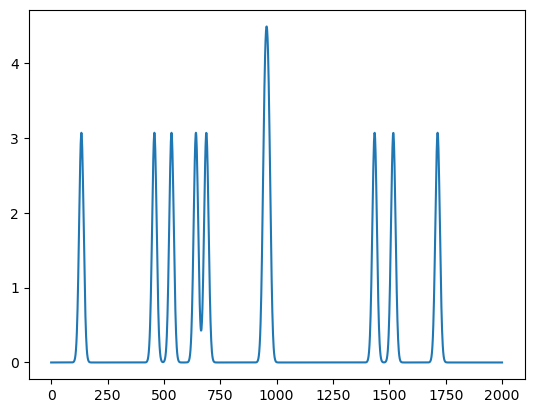

In [174]:
plt.plot(df_fm.at[9,"FmLt_gazeshift_rightPSTH"])